In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [3]:
road = cv2.imread("../Image_processing/Resources/DATA/road_image.jpg")

In [4]:
road_copy = np.copy(road)

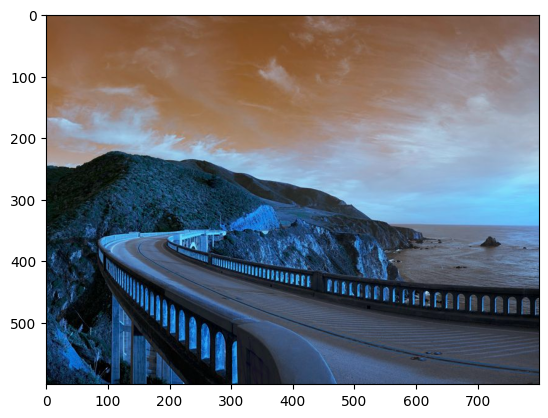

In [5]:
plt.imshow(road)

In [6]:
road.shape

(600, 800, 3)

In [7]:
marker_image = np.zeros(road.shape[:2], dtype=np.int32)

In [8]:
segments = np.zeros(road.shape, dtype=np.uint8)

In [9]:
marker_image.shape

(600, 800)

In [10]:
segments.shape

(600, 800, 3)

In [11]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3]) * 255)

In [12]:
colors = []
for i in range(10):
    colors.append(create_rgb(i))

In [13]:
colors

[(np.float64(31.0), np.float64(119.0), np.float64(180.0)),
 (np.float64(255.0), np.float64(127.0), np.float64(14.0)),
 (np.float64(44.0), np.float64(160.0), np.float64(44.0)),
 (np.float64(214.0), np.float64(39.0), np.float64(40.0)),
 (np.float64(148.0), np.float64(103.0), np.float64(189.0)),
 (np.float64(140.0), np.float64(86.0), np.float64(75.0)),
 (np.float64(227.0), np.float64(119.0), np.float64(194.0)),
 (np.float64(127.0), np.float64(127.0), np.float64(127.0)),
 (np.float64(188.0), np.float64(189.0), np.float64(34.0)),
 (np.float64(23.0), np.float64(190.0), np.float64(207.0))]

In [14]:
current_marker = 1
n_markers = 10
marks_updated = False

In [15]:
def mouse_callback(event, x, y, flags, param):
    global marks_updated

    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)
        cv2.circle(road_copy, (x, y), 10, colors[current_marker], -1)
        marks_updated = True

In [16]:
cv2.namedWindow('Road image')
cv2.setMouseCallback('Road image', mouse_callback)

while True:
    cv2.imshow('Watershed segments', segments)
    cv2.imshow('Road image', road_copy)
    
    k = cv2.waitKey(1)
    
    if k == 27:
        break

    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2], dtype=np.int32)
        segments = np.zeros(road.shape, dtype=np.uint8)

    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))

    if marks_updated:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        segments = np.zeros(road.shape, dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]    
cv2.destroyAllWindows()

KeyboardInterrupt: 